In [2]:
import pandas as pd
import numpy as np
import scipy.stats as sps 
import matplotlib.pyplot as plt 
import seaborn as sns
import sklearn as skl
from sklearn import preprocessing 
%matplotlib inline

In [4]:
%%time
mydata=pd.read_csv('applications data.csv')

CPU times: user 1.86 s, sys: 243 ms, total: 2.1 s
Wall time: 2.13 s


In [5]:
mydata.head()

,record,date,ssn,firstname,lastname,address,zip5,dob,homephone,fraud_label
0,1,20160101,379070012,XRRAMMTR,SMJETJMJ,6861 EUTST PL,2765,19070626,1797504115,0
1,2,20160101,387482503,MAMSTUJR,RTTEMRRR,7280 URASA PL,57169,19340615,4164239415,1
2,3,20160101,200332444,SZMMUJEZS,EUSEZRAE,5581 RSREX LN,56721,19070626,216537580,0
3,4,20160101,747451317,SJJZSXRSZ,ETJXTXXS,1387 UJZXJ RD,35286,19440430,132144161,0
4,5,20160101,24065868,SSSXUEJMS,SSUUJXUZ,279 EAASA WY,3173,19980315,6101082272,0


In [6]:
mydata.shape

(1000000, 10)

In [7]:
numrecords = len(mydata)
print(numrecords)

1000000


In [9]:
mydata.dtypes

record          int64
date            int64
ssn             int64
firstname      object
lastname       object
address        object
zip5            int64
dob             int64
homephone       int64
fraud_label     int64
dtype: object

In [10]:
mydata.describe()

,record,date,ssn,zip5,dob,homephone,fraud_label
count,1000000.000000,1.000000e+06,1.000000e+06,1000000.000000,1.000000e+06,1.000000e+06,1000000.000000
mean,500000.500000,2.016067e+07,5.083415e+08,50073.333143,1.951725e+07,5.368716e+09,0.014393
std,288675.278933,3.449869e+02,2.934864e+08,28915.921546,3.568872e+05,3.082161e+09,0.119104
min,1.000000,2.016010e+07,3.600000e+01,2.000000,1.900010e+07,5.937990e+05,0.000000
25%,250000.750000,2.016040e+07,2.542176e+08,24992.000000,1.916092e+07,2.677134e+09,0.000000
50%,500000.500000,2.016070e+07,5.088144e+08,50492.000000,1.950090e+07,5.399910e+09,0.000000
75%,750000.250000,2.016100e+07,7.630924e+08,74496.000000,1.983032e+07,8.109241e+09,0.000000
max,1000000.000000,2.016123e+07,1.000000e+09,99999.000000,2.016103e+07,1.000000e+10,1.000000


In [11]:
mydata.count()

record         1000000
date           1000000
ssn            1000000
firstname      1000000
lastname       1000000
address        1000000
zip5           1000000
dob            1000000
homephone      1000000
fraud_label    1000000
dtype: int64

In [12]:
mydata['date'].unique()

array([20160101, 20160102, 20160103, 20160104, 20160105, 20160106,
       20160107, 20160108, 20160109, 20160110, 20160111, 20160112,
       20160113, 20160114, 20160115, 20160116, 20160117, 20160118,
       20160119, 20160120, 20160121, 20160122, 20160123, 20160124,
       20160125, 20160126, 20160127, 20160128, 20160129, 20160130,
       20160131, 20160201, 20160202, 20160203, 20160204, 20160205,
       20160206, 20160207, 20160208, 20160209, 20160210, 20160211,
       20160212, 20160213, 20160214, 20160215, 20160216, 20160217,
       20160218, 20160219, 20160220, 20160221, 20160222, 20160223,
       20160224, 20160225, 20160226, 20160227, 20160228, 20160301,
       20160302, 20160303, 20160304, 20160305, 20160306, 20160307,
       20160308, 20160309, 20160310, 20160311, 20160312, 20160313,
       20160314, 20160315, 20160316, 20160317, 20160318, 20160319,
       20160320, 20160321, 20160322, 20160323, 20160324, 20160325,
       20160326, 20160327, 20160328, 20160329, 20160330, 20160

In [14]:
len(mydata['date'].unique())

365

In [15]:
mydata['date'].value_counts()

20160816    2877
20160304    2861
20160718    2849
20160417    2848
20160101    2840
20161228    2832
20160903    2832
20160808    2832
20160827    2831
20160609    2831
20160307    2831
20161006    2831
20160804    2828
20160313    2826
20160116    2819
20160330    2818
20160714    2818
20160823    2817
20161206    2815
20161024    2814
20161231    2814
20160411    2813
20160608    2813
20160726    2813
20161002    2811
20160130    2810
20161004    2810
20160108    2809
20160503    2809
20160928    2809
            ... 
20160704    2673
20160909    2672
20160802    2671
20161010    2668
20160705    2667
20160113    2667
20161216    2667
20161117    2667
20161126    2665
20160515    2663
20160122    2663
20161123    2662
20160711    2661
20161113    2659
20161226    2658
20160625    2655
20160412    2655
20160324    2653
20161104    2650
20161210    2650
20160817    2649
20160629    2649
20160919    2646
20160310    2643
20160907    2638
20160320    2637
20160409    2633
20161029    26

In [16]:
mydata['date'].count() * 100 / numrecords

100.0

In [31]:
from datetime import datetime
; 
mydata['date'] 

0         2016-01-01
1         2016-01-01
2         2016-01-01
3         2016-01-01
4         2016-01-01
5         2016-01-01
6         2016-01-01
7         2016-01-01
8         2016-01-01
9         2016-01-01
10        2016-01-01
11        2016-01-01
12        2016-01-01
13        2016-01-01
14        2016-01-01
15        2016-01-01
16        2016-01-01
17        2016-01-01
18        2016-01-01
19        2016-01-01
20        2016-01-01
21        2016-01-01
22        2016-01-01
23        2016-01-01
24        2016-01-01
25        2016-01-01
26        2016-01-01
27        2016-01-01
28        2016-01-01
29        2016-01-01
             ...    
999970    2016-12-31
999971    2016-12-31
999972    2016-12-31
999973    2016-12-31
999974    2016-12-31
999975    2016-12-31
999976    2016-12-31
999977    2016-12-31
999978    2016-12-31
999979    2016-12-31
999980    2016-12-31
999981    2016-12-31
999982    2016-12-31
999983    2016-12-31
999984    2016-12-31
999985    2016-12-31
999986    201

In [34]:
date = pd.to_datetime(mydata['date'])

In [35]:
date

0        2016-01-01
1        2016-01-01
2        2016-01-01
3        2016-01-01
4        2016-01-01
5        2016-01-01
6        2016-01-01
7        2016-01-01
8        2016-01-01
9        2016-01-01
10       2016-01-01
11       2016-01-01
12       2016-01-01
13       2016-01-01
14       2016-01-01
15       2016-01-01
16       2016-01-01
17       2016-01-01
18       2016-01-01
19       2016-01-01
20       2016-01-01
21       2016-01-01
22       2016-01-01
23       2016-01-01
24       2016-01-01
25       2016-01-01
26       2016-01-01
27       2016-01-01
28       2016-01-01
29       2016-01-01
            ...    
999970   2016-12-31
999971   2016-12-31
999972   2016-12-31
999973   2016-12-31
999974   2016-12-31
999975   2016-12-31
999976   2016-12-31
999977   2016-12-31
999978   2016-12-31
999979   2016-12-31
999980   2016-12-31
999981   2016-12-31
999982   2016-12-31
999983   2016-12-31
999984   2016-12-31
999985   2016-12-31
999986   2016-12-31
999987   2016-12-31
999988   2016-12-31


In [37]:
date.index = date.dt.to_period('m')
date = date.groupby(level=0).size()

In [38]:
date = date.reindex(pd.period_range(date.index.min(), date.index.max(), freq='m'), fill_value=0)
print (date)

2016-01    85199
2016-02    76792
2016-03    84871
2016-04    82515
2016-05    85083
2016-06    82035
2016-07    84943
2016-08    84830
2016-09    82374
2016-10    84865
2016-11    81602
2016-12    84891
Freq: M, Name: date, dtype: int64


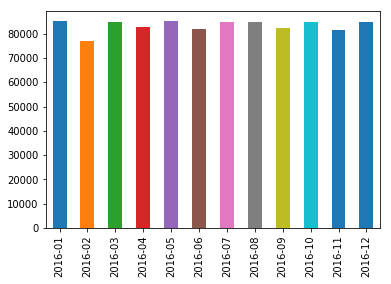

In [39]:
date.plot.bar()

In [40]:
len(mydata['ssn'].unique())

835819

In [41]:
mydata['ssn'].value_counts()

999999999    16935
938972725      114
810776805       81
829352390       74
473311863       44
165764866       34
189622157       30
295308935       30
588726212       29
163830210       29
687424410       28
826488428       25
457346566       24
77441357        24
901493436       24
407447121       24
325064391       23
258312431       23
256440495       23
406203526       23
176836012       22
108231635       22
118692079       22
907534928       22
849295926       21
727200669       21
127072438       21
205926169       21
936716159       21
365449201       21
             ...  
555709770        1
886488129        1
786443285        1
280300599        1
198509622        1
517282869        1
556508844        1
767001702        1
869786730        1
332917867        1
370179225        1
479229080        1
17829015         1
32513173         1
745542804        1
854639758        1
240178316        1
332438661        1
173059203        1
699876478        1
815223932        1
362245243   

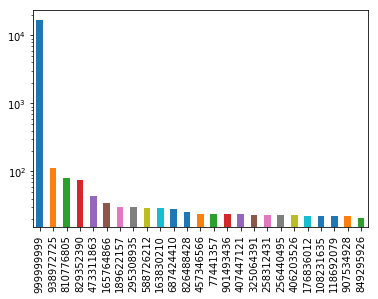

In [45]:
ssn=mydata['ssn'].value_counts().head(25).plot(kind='bar')
ssn.set_yscale('log')

In [85]:
len(mydata['firstname'].unique())

78136

In [86]:
mydata['firstname'].value_counts()

EAMSTRMT     12658
TXEMXZZM     10297
UXXJJZTUZ    10235
UJSRSMUEZ     9994
SREZUJMJU     9688
EASEXMJAT     7576
SSSXUEJMS     6923
SZUASTTA      6878
EREMTZXXA     6717
EAXRRUMUX     5686
USSZMRERM     5511
MJJJZUZTE     5294
MAUJMJTU      5022
RSZXMZRSU     5006
MEERZUXXU     4966
EZTERXZRA     4716
RTMMTSZRZ     4618
UXZUMTRTR     4600
UXJAUZRMM     4580
MSRUAREMU     4145
AAASERAT      4095
RURXRTZAM     4070
MRETXAZMJ     4047
XUERJXSTU     3839
RSXTZRTS      3822
XXMZSRXMA     3745
ZZURXRJS      3712
STRTETJUZ     3637
EMTJTUTSM     3607
MSXSMXSEM     3570
             ...  
EZZSAUZEX        1
UJAZZSXES        1
XSETMSEST        1
TZEMMMSR         1
SEMUXXRXJ        1
UEZRUTAUE        1
XRRXRJERU        1
EMJMZTSES        1
XEZXSSRTR        1
TJEAMSJT         1
RMAJRZETX        1
RZASUJZAZ        1
SZESJJRJM        1
MRUEXJXZM        1
UUEJMSJJJ        1
EMZXAMRTS        1
UZMZTATRM        1
MUSUETSX         1
EXXTEUAAE        1
EJXURRZJZ        1
RMXTTAXZT        1
UZUMZERUR   

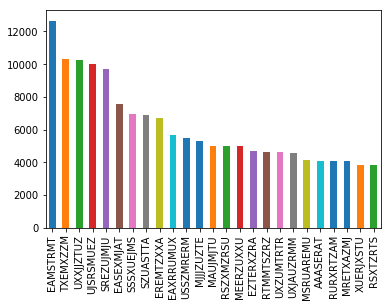

In [87]:
mydata['firstname'].value_counts().head(25).plot(kind='bar')

In [88]:
len(mydata['lastname'].unique())

177001

In [89]:
mydata['lastname'].value_counts()

ERJSAXA     8580
UMXUUUSE    7156
UMARRMA     6832
MEAXJUX     5492
XMERRR      5451
SXZXJRJT    4340
EUSEZRAE    4173
USMATTUR    4036
ETERUXME    3762
RJURSTXJ    3575
RTZRTZAS    3559
SRTRERMJ    3259
RMRXAMX     3074
RJRARJJU    3048
SUERZXAT    3026
EUXRMR      2757
STXAAZZM    2594
ETAJXSRE    2584
EASASTEM    2535
SMTTZJJX    2527
MZRUMMJ     2507
UXJEXUJR    2471
ARUZTZM     2360
SRRTAZTX    2309
SJURETUX    2289
UMUMAEZM    2275
RMERUMUM    2056
AJUZMTM     1989
EMRSJTXE    1963
RRUXSJRT    1901
            ... 
RUSZETZM       1
SZETJJMM       1
SZEAESMZ       1
SMJEZMA        1
UMRJMZRU       1
UAESRRJU       1
UAJMEXSU       1
UMSUTJZU       1
UZJERZXT       1
EZJAUXME       1
XJZTRXE        1
SXJJEASS       1
EAMMUJUS       1
UEXMASS        1
EMAEMRJR       1
UZSRJZTJ       1
RUJZXXMZ       1
SMEZSTRA       1
SATUXEER       1
EMTESRJZ       1
UMUSMMUT       1
SSZJSAA        1
UZAZXEJU       1
ESEEMRAU       1
RTMSZZMT       1
SJARXSMS       1
SZESMZAX       1
SMSSRAAZ      

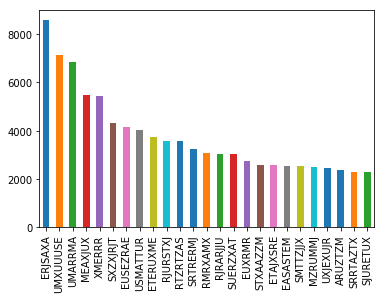

In [90]:
mydata['lastname'].value_counts().head(25).plot(kind='bar')

In [91]:
len(mydata['address'].unique())

828774

In [92]:
mydata['address'].value_counts()

123 MAIN ST       1079
1775 XJXE LN        97
7433 RAEZA ST       80
8911 MZSU DR        74
4907 RRAAU DR       73
426 XUAXZ BLVD      57
3545 ARMA ST        44
606 EZZAU WY        44
4530 ETSMX WY       42
4292 RUSMM LN       41
9693 ERJZA LN       40
3142 MZZE WY        36
5600 UETAR AVE      35
1425 UAATX ST       35
6637 UESAX LN       35
4479 RMEAZ PL       34
2611 AXXS CT        33
9777 RMJJU WY       32
8966 UAJER AVE      31
2026 UZJTX CT       31
1849 XUXRE DR       30
8198 UMJAJ DR       30
7651 RRMTE WY       30
3253 EMMZX LN       30
2105 RMTMA ST       30
1693 RJTTT CT       30
1569 XURRA RD       29
7017 SJJUZ WY       29
7157 UEMXE PL       29
7793 XASZE LN       28
                  ... 
6953 ETUEZ ST        1
2577 EAAZX DR        1
5029 EMSET RD        1
3936 REESU DR        1
1362 ESST PL         1
330 URTZX AVE        1
3192 UZSXA CT        1
3426 EXAXJ CT        1
820 EEURZ AVE        1
894 SETEX WY         1
1528 MXAU PL         1
4550 UERXM LN        1
6552 SRJEJ 

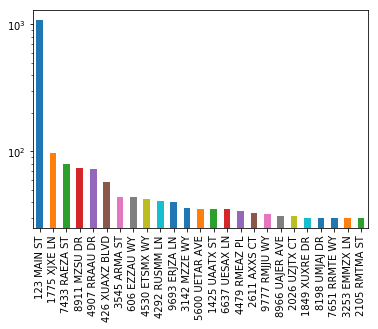

In [94]:
address=mydata['address'].value_counts().head(25).plot(kind='bar')
address.set_yscale('log')

In [46]:
len(mydata['zip5'].unique())

26370

In [47]:
mydata['zip5'].value_counts()

68138    823
90042    514
89835    489
35227    478
14931    459
86500    438
12700    436
1362     434
59695    432
52317    432
14455    431
64597    431
11848    428
34031    425
84983    419
80692    408
94992    406
47208    399
27132    397
94887    397
56155    385
13053    378
14200    375
68992    374
10664    373
50780    372
66902    371
9298     371
72192    370
90755    368
        ... 
37335      1
47475      1
31922      1
25068      1
93289      1
11392      1
88784      1
50341      1
86737      1
36098      1
11841      1
18797      1
15427      1
51581      1
97276      1
82131      1
74336      1
5928       1
35413      1
19699      1
52163      1
41653      1
37858      1
63579      1
40169      1
37527      1
54496      1
73481      1
52531      1
69618      1
Name: zip5, Length: 26370, dtype: int64

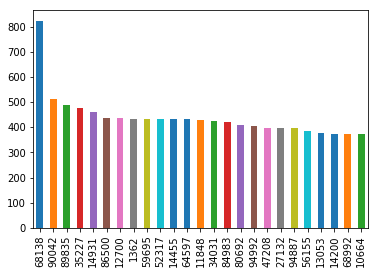

In [48]:
mydata['zip5'].value_counts().head(25).plot(kind='bar')

In [71]:
mydata['dob'] = pd.to_datetime(mydata['dob'], format='%Y%m%d').dt.strftime("%Y-%m-%d"); 
mydata['dob']

0         1907-06-26
1         1934-06-15
2         1907-06-26
3         1944-04-30
4         1998-03-15
5         1948-06-13
6         1964-03-18
7         1919-05-28
8         1990-03-14
9         1975-01-27
10        1940-01-26
11        1947-12-11
12        1900-01-22
13        1940-09-02
14        1936-08-29
15        1999-12-28
16        2008-04-01
17        1950-01-10
18        1990-11-13
19        2006-08-15
20        1977-03-28
21        1987-07-06
22        1958-08-30
23        1977-05-18
24        1938-12-24
25        1969-05-21
26        1988-11-11
27        1915-11-19
28        1989-06-13
29        1907-06-26
             ...    
999970    1994-02-24
999971    1996-03-19
999972    1907-06-26
999973    1951-05-03
999974    1907-06-26
999975    1928-05-01
999976    1952-04-10
999977    2001-05-22
999978    2013-01-05
999979    1944-02-19
999980    1949-07-25
999981    1912-12-02
999982    1931-08-31
999983    1957-01-18
999984    1900-08-13
999985    1915-07-01
999986    196

In [53]:
len(mydata['dob'].unique())

42673

In [54]:
mydata['dob'].value_counts()

19070626    126568
19640318      4818
19760625      3723
19880628      1404
19740216       980
20090127       280
19460901       135
19591208       126
19280611       120
19670215       102
19360908        81
19570630        69
20010904        69
20151012        67
20020315        65
19860425        56
19551013        55
19290921        54
19400301        52
19240409        52
19670629        50
19530920        50
19021213        50
20141117        49
19680820        49
19731101        48
19360713        48
19830419        47
20010907        47
19421110        47
             ...  
19851220         6
19741208         6
19700314         6
19611222         6
19970723         6
19350608         6
20060218         6
19110205         6
19690416         6
19850410         6
19061018         6
19910531         6
19840913         6
19611107         6
19210701         6
19521206         6
19280918         6
19481018         6
19860313         5
19330705         5
19960904         5
20030515    

In [72]:
mydata['dob'] = pd.to_datetime(mydata['dob'])

In [74]:
mydata['year'] = mydata['dob'].dt.year

In [75]:
mydata['year']

0         1907
1         1934
2         1907
3         1944
4         1998
5         1948
6         1964
7         1919
8         1990
9         1975
10        1940
11        1947
12        1900
13        1940
14        1936
15        1999
16        2008
17        1950
18        1990
19        2006
20        1977
21        1987
22        1958
23        1977
24        1938
25        1969
26        1988
27        1915
28        1989
29        1907
          ... 
999970    1994
999971    1996
999972    1907
999973    1951
999974    1907
999975    1928
999976    1952
999977    2001
999978    2013
999979    1944
999980    1949
999981    1912
999982    1931
999983    1957
999984    1900
999985    1915
999986    1964
999987    2006
999988    1961
999989    1907
999990    1924
999991    1907
999992    1949
999993    1934
999994    1936
999995    1955
999996    1915
999997    1988
999998    2012
999999    1982
Name: year, Length: 1000000, dtype: int64

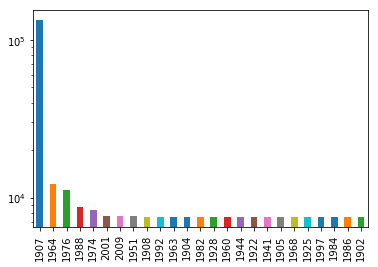

In [80]:
year=mydata['year'].value_counts().head(25).plot(kind='bar')
year.set_yscale('log')

In [78]:
len(mydata['homephone'].unique())

28244

In [79]:
mydata['homephone'].value_counts()

9999999999    78512
6384782007      466
6035129044      360
2113738531      331
4024680535      198
2669445638      172
6637507363      169
8629049955      139
3364980740      110
1324008228      108
6845279110      108
8880326532      107
2841944187      107
5014272561      106
8477710704      106
6773573704      105
3417174496      104
6538326086      104
7460887672      103
1133829511      103
1721670786      103
5753452592      100
6051690361       99
4701588077       99
7304949596       98
1252191250       98
7279614471       98
7666418262       96
4236591930       96
5930087830       96
              ...  
3152497907        1
4173896871        1
7909661647        1
1487242890        1
7813229119        1
2957613865        1
6975375821        1
4382854075        1
2723400856        1
8157246551        1
6773922191        1
5203848044        1
6361389271        1
5150223351        1
8507465472        1
3850395065        1
3828148714        1
1763757379        1
6724376073        1


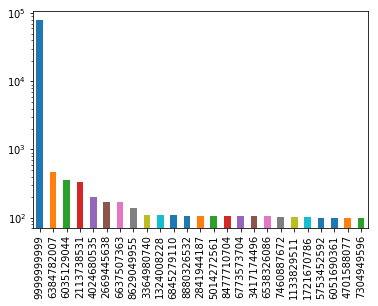

In [81]:
phone=mydata['homephone'].value_counts().head(25).plot(kind='bar')
phone.set_yscale('log')

In [82]:
len(mydata['fraud_label'].unique())

2

In [83]:
mydata['fraud_label'].value_counts()

0    985607
1     14393
Name: fraud_label, dtype: int64

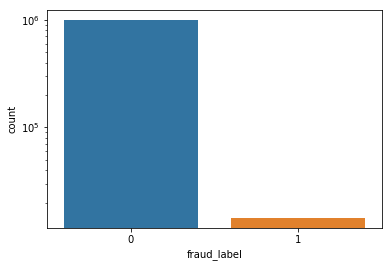

In [84]:
fraud = sns.countplot(x='fraud_label', data = mydata)
fraud.set_yscale('log')